Esercizio 2: visualizzare il grafico del numero di clienti per ogni stato

1. connessione al database
2. recuperiamo le informazioni (sql-query)
3. inserisco esse nel df pandas
4. visualizzo il grafico con matplotlib

In [1]:
!pip install pyodbc

In [2]:
import pyodbc 

In [3]:
SERVER = '192.168.40.16\sqlexpress'
DATABASE = 'zhao.filippo'
USERNAME = 'zhao.filippo'
PASSWORD = 'xxx123##'

In [4]:
connectionString = f'DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}'

In [5]:
conn = pyodbc.connect(connectionString)

In [6]:
sql_query = """
select sales.customers.state, COUNT(*) as numeroClienti 
from sales.customers
group by sales.customers.state
order by COUNT(*) desc
"""

In [7]:
import pandas as pd

In [8]:
data = pd.read_sql(sql_query, conn)
data

,state,numeroClienti
0,NY,1019
1,CA,284
2,TX,142


In [9]:
import matplotlib.pyplot as plt

In [10]:
x = data.state
y = data.numeroClienti

Text(0, 0.5, 'numero clienti')

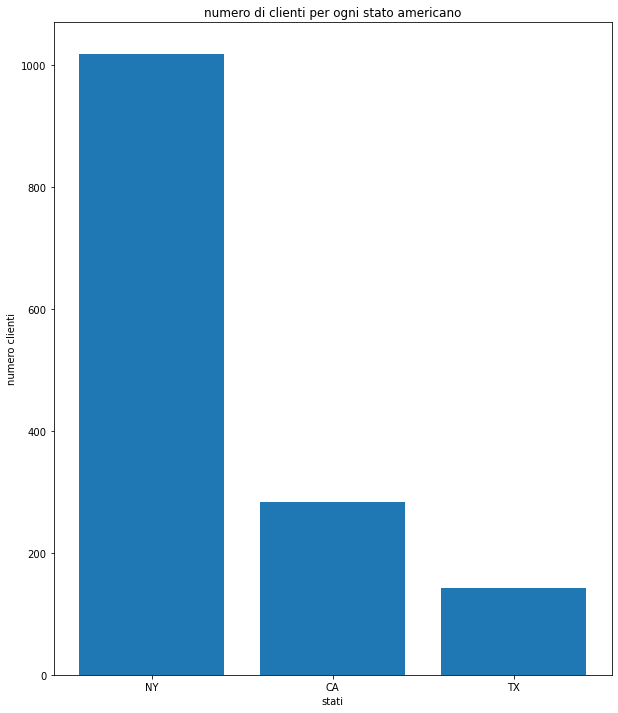

In [15]:
fig, ax = plt.subplots(figsize = (10, 12))
ax.bar(x = x, height = y)
ax.set_title('numero di clienti per ogni stato americano')
ax.set_xlabel('stati')
ax.set_ylabel('numero clienti')